# Read raiting rating csv, joined products table and drop un-used column 

In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import warnings; 

warnings.simplefilter('ignore')

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
0,CSSMs Biology: Control in Cells and in Organis...,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
1,Treasure Island,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
2,Collins Primary Dictionaries – Collins Junior ...,"832,476,739",832,图书音像,476,其它图书,739.0,工具书
3,Partners in Crime,"832,476,923",832,图书音像,476,其它图书,923.0,进口图书
4,The Hobbit,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿


In [12]:
raiting.sample(10)
display(products.sample(10))

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
520881,Why生命科学,"832,1101,1086",832,图书音像,1101,少儿/教育图书,1086.0,少儿
81085,Sportica 斯波帝卡 男式 长袖衬衫 11152399,"1111,864,781",1111,运动户外,864,户外装备,781.0,军迷用品
464460,红楼梦中的国学智慧,"832,519,1",832,图书音像,519,文学艺术,1.0,小说
282970,通用经济系列教材:国际经济学,"832,1101,379",832,图书音像,1101,少儿/教育图书,379.0,教材
199014,2014考研英语阅读理解精读100篇(高分版)新东方考研英语培训教材 (新东方),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
181494,圆月弯刀(绘图珍藏本),"832,519,1",832,图书音像,519,文学艺术,1.0,小说
129989,简单取穴图解,"832,1096,867",832,图书音像,1096,科技类图书,867.0,医学
440781,LACO 朗坤 Vintage系列 自动机械 男表 861777,"486,487,387",486,钟表/首饰/眼镜/礼品,487,钟表,387.0,闹钟
516344,汽车驾照考领指南(第3版),"832,665,742",832,图书音像,665,生活类图书,742.0,休闲/爱好


# Visualization of the rating distribution

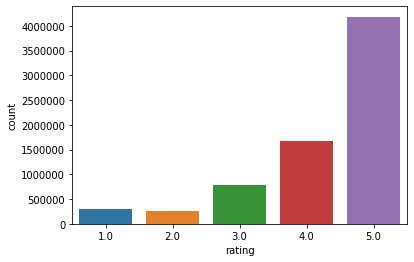

In [13]:
sns.countplot(data=raiting[raiting.rating > 0] , x = 'rating' )
plt.show()

# Filter some non-valueable rating

In [14]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 40 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 60 ].index)]
print(raitingFiltered.shape)

(2061909, 3)
(7202921, 3)
(75284, 3)


# Make the product-user martix and drop duplicates

In [15]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='productId' , columns='userId' , values="rating" ).fillna(0)

In [16]:
display(raitingFilteredPivot.sample(10))

userId,47.0,54.0,119.0,238.0,270.0,391.0,392.0,553.0,606.0,684.0,...,252345.0,259187.0,276110.0,285544.0,290730.0,299260.0,322224.0,328591.0,335953.0,353133.0
productId,,,,,,,,,,,,,,,,,,,,,
125308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425609,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Use sklearn NearestNeighbors methods to find the top-n similar items and recommend to users

In [20]:
#item based:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

itemId = 489000
queryIndex = raitingFilteredPivot.index.get_loc(itemId)
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=11)

print('Recommendations for {0} ( {1} | {2} | {3} :\n'.format( products.iloc[raitingFilteredPivot.index[queryIndex]].product_name ,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat1_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat2_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat3_name))
print(indices)
print(indices.flatten())
for i in range(0, len(distances.flatten())):
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].product_name ,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat1_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat2_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for Kingston 金士顿 Class10 8G TF卡(micro SD)手机存储卡 (二合一套装) ( 电脑/办公 | 存储设备 | 存储卡 :

[[38035 31525   636 31295 33875 34994  8141 29841  2320  1115 29840]]
[38035 31525   636 31295 33875 34994  8141 29841  2320  1115 29840]
0: Kingston 金士顿 Class10 8G TF卡(micro SD)手机存储卡 (二合一套装) ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.0:
1: Kingston 金士顿 Class4 32G TF卡(micro SD)手机存储卡 (二合一套装) ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.07588438434260847:
2: Kingston 金士顿 Class4 32G TF卡(micro SD)手机存储卡 ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.11417541410013121:
3: Kingston 金士顿 Class4 16G TF卡(micro SD)手机存储卡 ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.22351877241145202:
4: SanDisk 闪迪 microSDHC Class10 64GB 至尊极速移动存储卡 UHS-1制式 读取速度最高可达80MB/s 金红色 ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.6530798250103607:
5: SanDisk 闪迪 microSDHC Class10 16GB至尊高速移动存储卡 UHS-1制式 读写速度最高可达30MB/s ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.6534294658652479:
6: SanDisk 闪迪 microSDHC Class10 32GB 至尊极速移动存储卡 UHS-1制式 读取速度最高可达4